In [ ]:
### Check for GPU status
!nvidia-smi

Wed Apr 14 17:33:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
### 連結 google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### 移動到專案資料夾
import os
os.chdir('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy')
!ls

data			     sumission_V10.csv	  sumission_V6.csv
Interview_DDT.ipynb	     sumission_V11.csv	  sumission_V7.csv
m5-forecasting-accuracy.zip  sumission_V12.csv	  sumission_V8.csv
ml_1_result2.csv	     sumission_V1.csv	  sumission_V9.csv
ml_1_result2_va.csv	     sumission_V2.csv	  training_columns
ml_1_result.csv		     sumission_V2_M0.csv  train_new.csv
predict_new.csv		     sumission_V3.csv	  train_new_good.csv
predict_new_good.csv	     sumission_V4.csv	  train_new_STRTEST.csv
sumission_1.csv		     sumission_V5_o.csv


In [ ]:
### 解壓縮 Data
# !unzip "/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/m5-forecasting-accuracy.zip" -d "data"

Archive:  /content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/m5-forecasting-accuracy.zip
  inflating: data/calendar.csv       
  inflating: data/sales_train_evaluation.csv  
  inflating: data/sales_train_validation.csv  
  inflating: data/sample_submission.csv  
  inflating: data/sell_prices.csv    


### Packages

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import time
from IPython.display import clear_output
import pandas as pd
import numpy as np
import os

### Data_original

In [ ]:
train_raw = pd.read_csv("/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/data/sales_train_validation.csv")
test_raw = pd.read_csv("/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/data/sales_train_evaluation.csv")
prices_raw = pd.read_csv("/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/data/sell_prices.csv")
calendar_raw = pd.read_csv("/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/data/calendar.csv")
submit_sample = pd.read_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/data/sample_submission.csv')

test_raw.head(10)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,2,1,2,1,1,1,0,1,1,1,0,0,1,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,0,1,0,5,4,1,0,1,3,7,2,0,0,1,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,1,1,0,1,1,2,2,2,4,1,0,2,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0
5,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,2,0,0,0,0,1,0,0,2,4,1,0,0,0,2,1,0,0,3,0,5,2,1,0,0,1,0,0,5,2,0
6,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
7,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,0,4,6,5,7,0,13,2,2,20,9,3,0,1,0,0,0,10,4,4,2,6,2,0,0,0,0,0,0,0,...,8,4,0,0,1,37,3,4,6,3,2,1,19,3,2,8,8,23,26,9,4,8,5,8,5,0,3,1,18,47,7,0,6,0,15,5,4,1,40,32
8,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,0,2,3,9,0,0,4,3,1,0,4,4,1,2,0,1,1,5,2,2,2,3,0,0,8,0,0,0,0,0,...,0,0,0,0,1,1,6,0,0,0,0,0,0,2,6,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9,HOBBIES_1_010_CA_1_evaluation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2,0,2,0,2,1,0,0,0,0,0,0,0,0,2,0,2,1,0,0,1,0,0,1,0,2,1,1,0,0,1


### 基本圖表

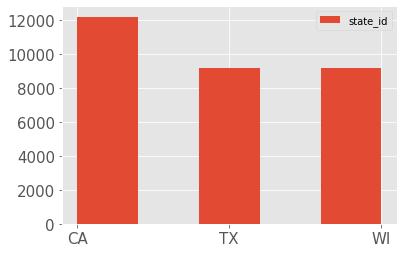

In [ ]:
test_raw['state_id'].hist(xlabelsize=15,ylabelsize=15, bins=5,legend=True)  

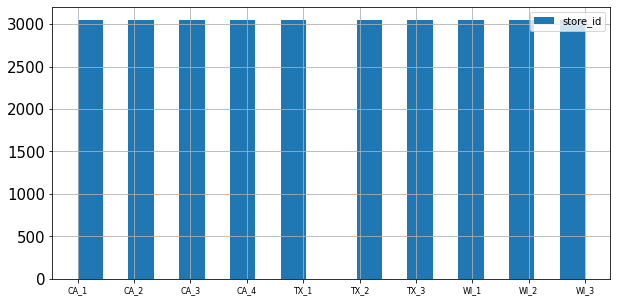

In [ ]:
test_raw['store_id'].hist(xlabelsize=8,ylabelsize=15, bins=20,legend=True ,figsize = (10,5))  

count       30490
unique          7
top       FOODS_3
freq         8230
Name: dept_id, dtype: object
FOODS 品項數目為：  1437
HOBBIES 品項數目為：  565
HOUSEHOLD 品項數目為：  1047


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


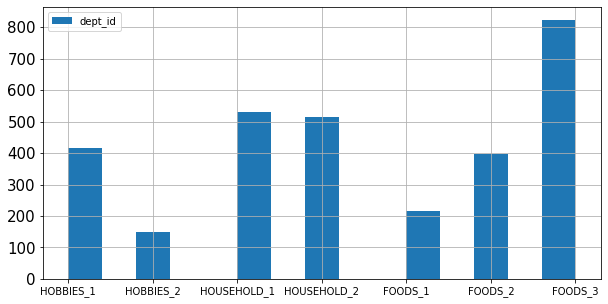

In [ ]:
train_raw[train_raw['store_id']=="CA_1"]['dept_id'].hist(xlabelsize=10,ylabelsize=15, bins=15,legend=True,figsize = (10,5))
print(train_raw['dept_id'].describe())
print("FOODS 品項數目為： ", train_raw[train_raw['store_id']=="CA_1"][train_raw['cat_id']=="FOODS"]["cat_id"].count())
print("HOBBIES 品項數目為： ", train_raw[train_raw['store_id']=="CA_1"][train_raw['cat_id']=="HOBBIES"]["cat_id"].count())
print("HOUSEHOLD 品項數目為： ", train_raw[train_raw['store_id']=="CA_1"][train_raw['cat_id']=="HOUSEHOLD"]["cat_id"].count())

2011 年總促銷活動數量：  27
2012 年總促銷活動數量：  30
2013 年總促銷活動數量：  30
2014 年總促銷活動數量：  30
2015 年總促銷活動數量：  30
2016 年總促銷活動數量：  20


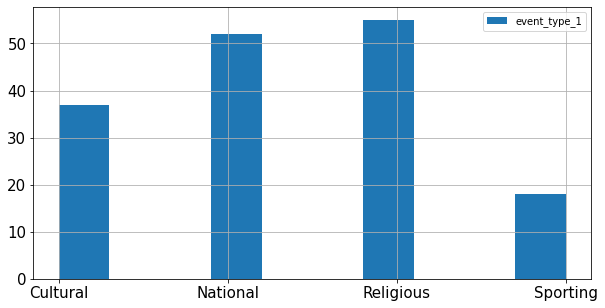

In [ ]:
calendar_raw['event_type_1'].sort_values(ascending=True).hist(xlabelsize=15,ylabelsize=15, bins=10,legend=True,figsize = (10,5))
print("2011 年總促銷活動數量： ",calendar_raw[calendar_raw['year']==2011]['event_type_1'].count() + calendar_raw[calendar_raw['year']==2011]['event_type_2'].count())
print("2012 年總促銷活動數量： ",calendar_raw[calendar_raw['year']==2012]['event_type_1'].count() + calendar_raw[calendar_raw['year']==2012]['event_type_2'].count())
print("2013 年總促銷活動數量： ",calendar_raw[calendar_raw['year']==2013]['event_type_1'].count() + calendar_raw[calendar_raw['year']==2013]['event_type_2'].count())
print("2014 年總促銷活動數量： ",calendar_raw[calendar_raw['year']==2014]['event_type_1'].count() + calendar_raw[calendar_raw['year']==2014]['event_type_2'].count())
print("2015 年總促銷活動數量： ",calendar_raw[calendar_raw['year']==2015]['event_type_1'].count() + calendar_raw[calendar_raw['year']==2015]['event_type_2'].count())
print("2016 年總促銷活動數量： ",calendar_raw[calendar_raw['year']==2016]['event_type_1'].count() + calendar_raw[calendar_raw['year']==2016]['event_type_2'].count())

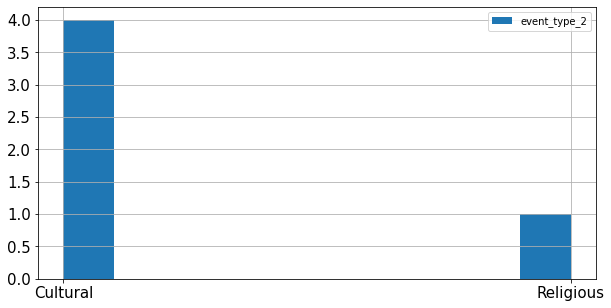

In [ ]:
calendar_raw['event_type_2'].sort_values(ascending=True).hist(xlabelsize=15,ylabelsize=15, bins=10,legend=True,figsize = (10,5))

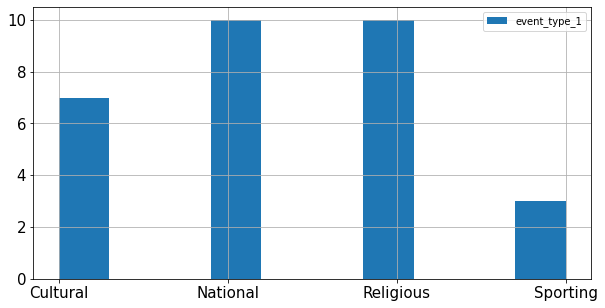

In [ ]:
calendar_raw[calendar_raw['year']==2015]['event_type_1'].sort_values(ascending=True).hist(xlabelsize=15,ylabelsize=15, bins=10,legend=True,figsize = (10,5))


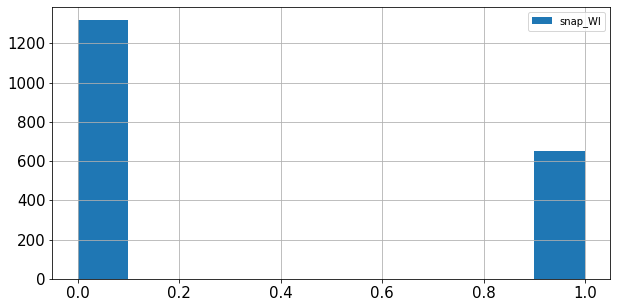

In [ ]:
calendar_raw['snap_WI'].hist(xlabelsize=15,ylabelsize=15,legend=True,figsize = (10,5))

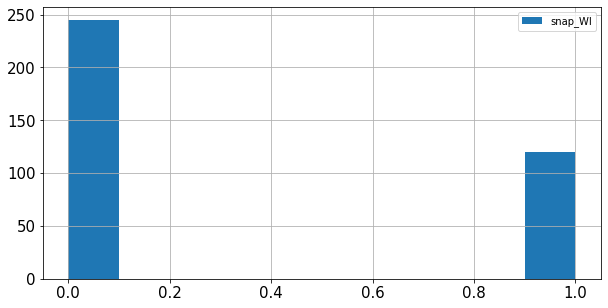

In [ ]:
calendar_raw[calendar_raw['year']==2015]['snap_WI'].hist(xlabelsize=15,ylabelsize=15,legend=True,figsize = (10,5))

In [ ]:
print("CA 總天數: ", len(calendar_raw["snap_CA"]))
print("CA SNAP天數: ", calendar_raw["snap_CA"].sum())
print("TX 總天數: ", len(calendar_raw["snap_TX"]))
print("TX SNAP天數: ", calendar_raw["snap_TX"].sum())
print("WI 總天數: ", len(calendar_raw["snap_WI"]))
print("WI SNAP天數: ", calendar_raw["snap_WI"].sum())


CA 總天數:  1969
CA SNAP天數:  650
TX 總天數:  1969
TX SNAP天數:  650
WI 總天數:  1969
WI SNAP天數:  650


### 檢視資料集

In [ ]:
calendar_raw

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
test_raw

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,2,1,2,1,1,1,0,1,1,1,0,0,1,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,0,1,0,5,4,1,0,1,3,7,2,0,0,1,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,1,1,0,1,1,2,2,2,4,1,0,2,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,0,3,1,4,1,0,0,3,4,4,0,0,1,0,1,1,7,7,3,6,3,3,7,12,4,2,7,5,12,5,...,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,2,2,0,0,0,2,0,0,1,1,1,0,0,1,0,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,5,0,1,1,3,1,1,0,4,2,0,1,2,1,1,0,0,0,0,3,1,1,1,2,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,2,4,1,8,5,2,7,5,3,5,20,8,10,3,3,4,7,2,3,5,6,3,4,1,2,5,1,2,2,2,...,0,0,2,1,0,2,0,1,0,0,1,0,0,0,1,1,0,2,1,1,0,0,1,0,0,1,0,3,3,1,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,1,0,0,1,0,3,1,3,1,3,0,1,2,1,0,2,1,1,2,0,2,1,1,0,2,1,1,1,1,4,6,0,1,1,1,0


In [ ]:
prices_raw

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [ ]:
prices_raw['wm_yr_wk'].describe()

count    6.841121e+06
mean     1.138294e+04
std      1.486100e+02
min      1.110100e+04
25%      1.124700e+04
50%      1.141100e+04
75%      1.151700e+04
max      1.162100e+04
Name: wm_yr_wk, dtype: float64

### 資料整理 - part1 calender info to prices data

In [ ]:
analysis_df = calendar_raw[['d','wm_yr_wk']].copy()
analysis_df.drop_duplicates('d','first',inplace=True)
analysis_df

,d,wm_yr_wk
0,d_1,11101
1,d_2,11101
2,d_3,11101
3,d_4,11101
4,d_5,11101
...,...,...
1964,d_1965,11620
1965,d_1966,11620
1966,d_1967,11620
1967,d_1968,11621


In [ ]:
prices_clean1 = prices_raw.merge(analysis_df, on='wm_yr_wk')
prices_clean1

,store_id,item_id,wm_yr_wk,sell_price,d
0,CA_1,HOBBIES_1_001,11325,9.58,d_897
1,CA_1,HOBBIES_1_001,11325,9.58,d_898
2,CA_1,HOBBIES_1_001,11325,9.58,d_899
3,CA_1,HOBBIES_1_001,11325,9.58,d_900
4,CA_1,HOBBIES_1_001,11325,9.58,d_901
...,...,...,...,...,...
47735392,WI_3,FOODS_3_825,11105,4.00,d_31
47735393,WI_3,FOODS_3_825,11105,4.00,d_32
47735394,WI_3,FOODS_3_825,11105,4.00,d_33
47735395,WI_3,FOODS_3_825,11105,4.00,d_34


In [ ]:
train_new = pd.DataFrame(columns=['store_id','item_id','wm_yr_wk','sell_price', 'd',	'units'])
start = time.time()

for i in range(1941):
  a = i + 1
  day = 'd_' + str(a)
  train_new = pd.concat([train_new , prices_clean1[prices_clean1['d']==day].merge(test_raw[['store_id','item_id', day]], on=['store_id','item_id']).rename(columns={day:"units"})], ignore_index=True)

  end = time.time()

  print(end-start, " loop:", a)

  clear_output(wait=True)

14115.928947687149  loop: 1941


In [ ]:
analysis_df1 = calendar_raw[['d', 'date']].copy()
analysis_df1.drop_duplicates('date','first',inplace=True)
train_new = train_new.merge(analysis_df1, on='d')
train_new['sales'] = train_new['sell_price'] * train_new['units']
train_new['item_type'] = train_new.item_id.str[0:-6]
event_info = calendar_raw[['date', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']].fillna(0)
train_new = train_new.merge(event_info, on='date')
train_new.to_csv('train_new.csv',index=False)

In [ ]:
predict_new = pd.DataFrame(columns=['store_id','item_id','wm_yr_wk','sell_price', 'd',	'units'])
start = time.time()

for i in range(1941,1969):
  a = i + 1
  day = 'd_' + str(a)
  predict_new = pd.concat([predict_new , prices_clean1[prices_clean1['d']==day].merge(test_raw[['store_id','item_id']], on=['store_id','item_id']).rename(columns={day:"units"})], ignore_index=True)

  end = time.time()

  print(end-start, " loop:", a)

  clear_output(wait=True)

81.05648040771484  loop: 1970


In [ ]:
analysis_df1 = calendar_raw[['d', 'date']].copy()
analysis_df1.drop_duplicates('date','first',inplace=True)
predict_new = predict_new.merge(analysis_df1, on='d')
predict_new['item_type'] = predict_new.item_id.str[0:-6]
event_info = calendar_raw[['date', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']].fillna(0)
predict_new = predict_new.merge(event_info, on='date')
# predict_new.to_csv('predict_new.csv',index=False)

### Data_new

In [ ]:
train_new_cols =['store_id',	'item_id',	'wm_yr_wk',	'sell_price',	'd',	'units',	'date',	'sales',	'item_type',	'event_name_1',	'event_type_1',	'event_name_2',	'event_type_2']
# train_new_cols =['item_id','units',"d",'store_id']
train_new = pd.read_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/train_new.csv', usecols=train_new_cols, dtype={'item_id':"category","units": "int16"})

predict_new_cols = ['store_id',	'item_id',	'wm_yr_wk',	'sell_price',	'd',	'units']
predict_new = pd.read_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/predict_new.csv', usecols=predict_new_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
len(train_new[train_new['d']=="d_1"])

10932

In [ ]:
len(prices_raw[prices_raw['wm_yr_wk'] == prices_raw['wm_yr_wk'].min()])

10932

In [ ]:
predict_new.head(10)

,store_id,item_id,wm_yr_wk,sell_price,d,units
0,CA_1,HOBBIES_1_001,11617,8.38,d_1942,NaN
1,CA_1,HOBBIES_1_002,11617,3.97,d_1942,NaN
2,CA_1,HOBBIES_1_003,11617,2.97,d_1942,NaN
3,CA_1,HOBBIES_1_004,11617,4.64,d_1942,NaN
4,CA_1,HOBBIES_1_005,11617,2.88,d_1942,NaN
5,CA_1,HOBBIES_1_006,11617,0.96,d_1942,NaN
6,CA_1,HOBBIES_1_007,11617,7.88,d_1942,NaN
7,CA_1,HOBBIES_1_008,11617,0.48,d_1942,NaN
8,CA_1,HOBBIES_1_009,11617,1.77,d_1942,NaN
9,CA_1,HOBBIES_1_010,11617,2.97,d_1942,NaN


### 資料整理 - part2 Overall Sales Analysis

In [ ]:
overall_sales = train_new[['date','sales']].groupby(by=["date"]).sum()
overall_sales.reset_index(inplace=True)
overall_sales['date'] = pd.to_datetime(overall_sales['date'])

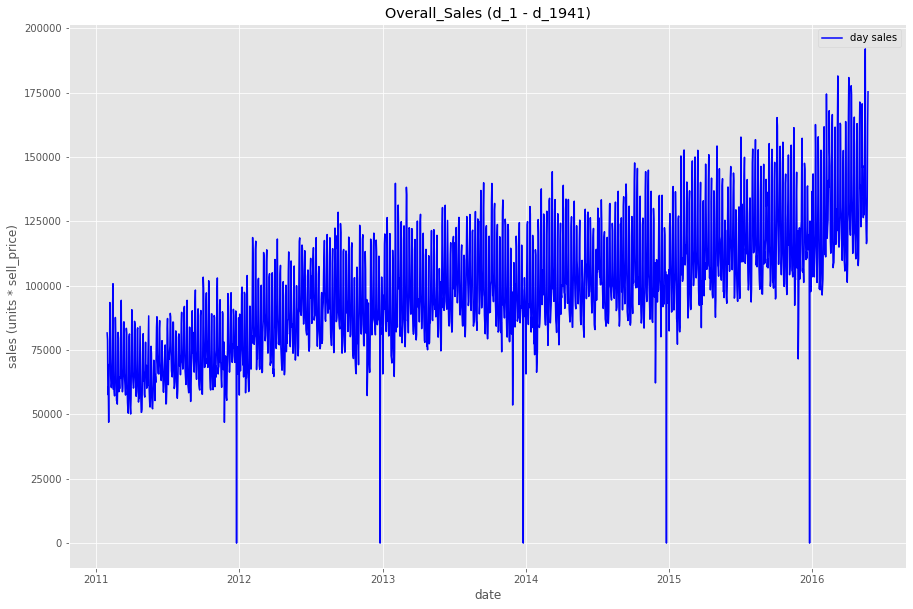

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')
%matplotlib inline

plt.figure(figsize = (15,10))
plt.plot(overall_sales["date"], overall_sales["sales"],c = "b")  

# 設定圖例，參數為標籤、位置
plt.title("Overall_Sales (d_1 - d_1941)")
plt.legend(labels=["day sales"])
plt.xlabel("date")
plt.ylabel("sales (units * sell_price)")

plt.show()

In [ ]:
# 逢聖誕節 (12/25) walmart 多數分店沒有營業 
overall_sales[overall_sales['sales']<500]

,date,sales
330,2011-12-25,23.68
696,2012-12-25,24.73
1061,2013-12-25,34.32
1426,2014-12-25,37.86
1791,2015-12-25,30.79


In [ ]:
overall_sales_op = train_new[train_new['item_id'].isin(train_new[train_new['d']=="d_1"]['item_id'])][['date','sales']].groupby(by=["date"]).sum()
overall_sales_op.reset_index(inplace=True)
overall_sales_op['date'] = pd.to_datetime(overall_sales_op['date'])

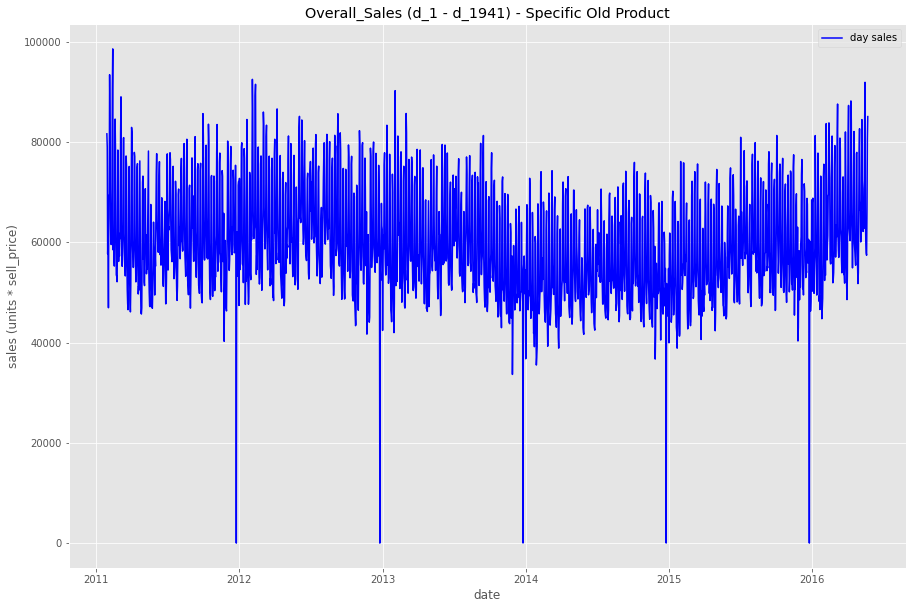

In [ ]:
style.use('ggplot')
%matplotlib inline

plt.figure(figsize = (15,10))
plt.plot(overall_sales_op["date"], overall_sales_op["sales"],c = "b")  

# 設定圖例，參數為標籤、位置
plt.title("Overall_Sales (d_1 - d_1941) - Specific Old Product")
plt.legend(labels=["day sales"])
plt.xlabel("date")
plt.ylabel("sales (units * sell_price)")

plt.show()

In [ ]:
len(train_new['item_id'].unique())

3049

In [ ]:
train_new['item_type'] = train_new.item_id.str[0:-6]

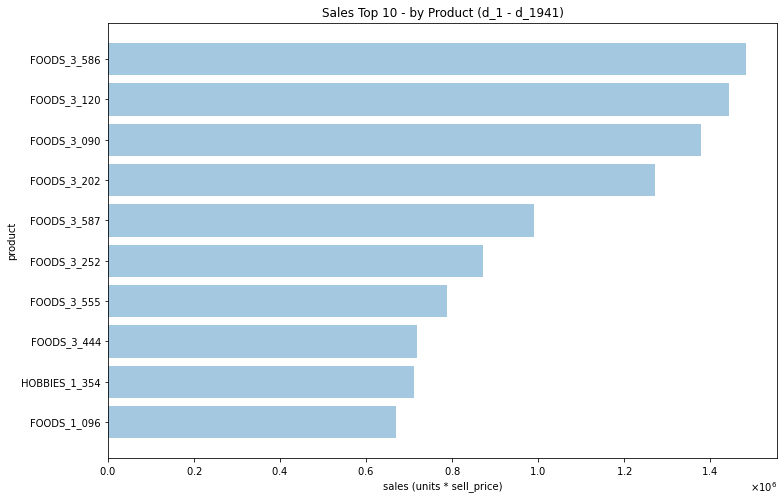

In [ ]:
overall_sales_bp = train_new[['item_id','sales']].groupby(by=["item_id"]).sum()
overall_sales_bp.reset_index(inplace=True)
overall_sales_bp = overall_sales_bp.sort_values(by='sales', ascending=True)

fig, ax = plt.subplots(figsize = (12,8))

ax.barh(overall_sales_bp["item_id"][-10:], overall_sales_bp["sales"][-10:], align='center', alpha=0.4)
ax.ticklabel_format(axis='x', useMathText=True)
ax.set_title("Sales Top 10 - by Product (d_1 - d_1941)")
ax.set_xlabel("sales (units * sell_price)")
ax.set_ylabel("product")

plt.show()

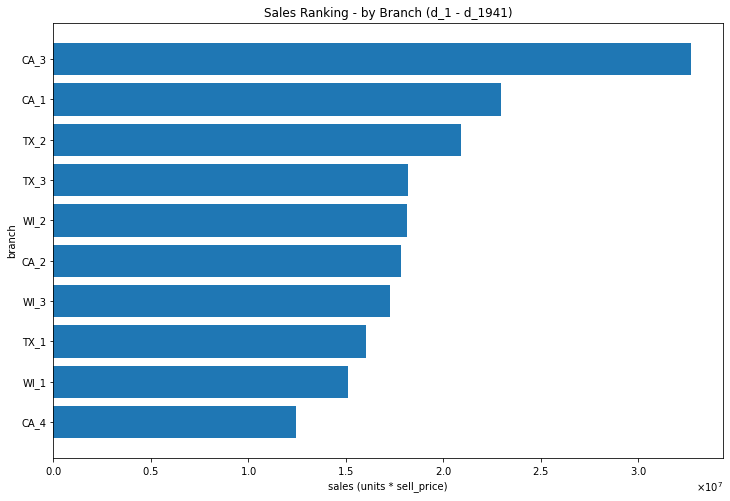

In [ ]:
overall_sales_bs = train_new[['store_id','sales']].groupby(by=["store_id"]).sum()
overall_sales_bs.reset_index(inplace=True)
overall_sales_bs = overall_sales_bs.sort_values(by='sales', ascending=True)

fig, ax = plt.subplots(figsize = (12,8))

ax.barh(overall_sales_bs["store_id"], overall_sales_bs["sales"], align='center', alpha=1)
ax.ticklabel_format(axis='x', useMathText=True)
ax.set_title("Sales Ranking - by Branch (d_1 - d_1941)")
ax.set_xlabel("sales (units * sell_price)")
ax.set_ylabel("branch")

plt.show()

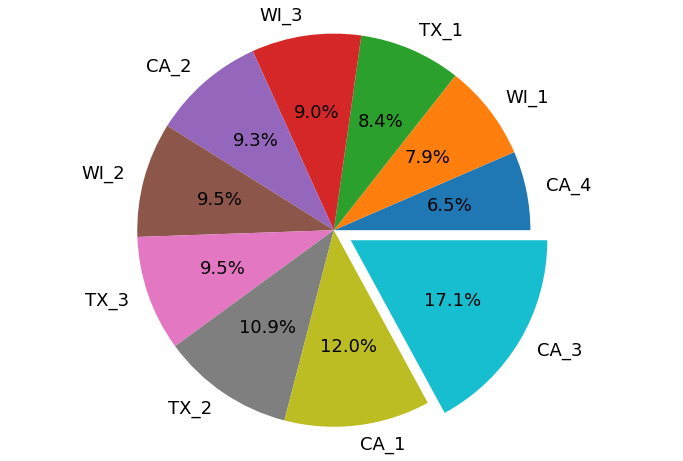

In [ ]:
fig1, ax1 = plt.subplots(figsize = (12,8))
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)
ax1.pie(overall_sales_bs["sales"], labels=overall_sales_bs["store_id"], autopct='%1.1f%%',explode=explode,textprops={'fontsize': 18})
ax1.axis('equal')

plt.show()

# ML part

### Training Data Preparation

In [ ]:
### 資料準備

### 資料整理 efficient way: https://towardsdatascience.com/%EF%B8%8F-load-the-same-csv-file-10x-times-faster-and-with-10x-less-memory-%EF%B8%8F-e93b485086c7

### 特徵值 - 店家別(one hot)、年度、月份(one hot)、商品類別(one hot)、商品項目(one hot)、商品價格、活動類別1(one hot)、活動類別2(one hot)

store_oh = pd.get_dummies(train_new['store_id'])
year = pd.DataFrame(pd.DatetimeIndex(train_new['date']).year)
month = pd.get_dummies(pd.DatetimeIndex(train_new['date']).month)
item_type_oh = pd.get_dummies(train_new['item_type'])
prices = train_new['sell_price']

event_1_name = pd.get_dummies(train_new[['event_name_1']])
event_1_type = pd.get_dummies(train_new[['event_type_1']])
event_2_name = pd.get_dummies(train_new[['event_name_2']])
event_2_type = pd.get_dummies(train_new[['event_type_2']])

In [ ]:
overall_sales_pq = train_new[['item_id','units']].groupby(by=["item_id"]).sum()
overall_sales_pq.reset_index(inplace=True)
overall_sales_pq = overall_sales_pq.sort_values(by='units', ascending=True)
overall_sales_pq['item_index'] = range(0,3049)
# item_id_train = train_new[['item_id']].merge(overall_sales_pq[['item_id','item_index']], on='item_id')['item_index']

In [ ]:
# os.mkdir('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/training_columns')

# store_oh.to_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/training_columns/store_oh.csv',index=False)
# year.to_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/training_columns/year.csv',index=False)
# month.to_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/training_columns/month.csv',index=False)
# item_type_oh.to_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/training_columns/item_type_oh.csv',index=False)
# prices.to_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/training_columns/prices.csv',index=False)

# event_1_name[event_1_name.columns[2:].tolist()].to_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/training_columns/event_1_name.csv',index=False)
# event_1_type[event_1_type.columns[2:].tolist()].to_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/training_columns/event_1_type.csv',index=False)
# event_2_name[event_2_name.columns[2:].tolist()].to_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/training_columns/event_2_name.csv',index=False)
# event_2_type[event_2_type.columns[2:].tolist()].to_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/training_columns/event_2_type.csv',index=False)

# item_id_train.to_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/training_columns/item_id_train.csv',index=False)


### Load columns data

In [ ]:
store_oh_cols = ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2','WI_3']
year_cols = ['date']
month_cols = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
item_type_oh_cols = ['FOODS', 'HOBBIES', 'HOUSEHOLD']
prices_cols = ['sell_price']
item_id_train_cols = ['item_index']

event_1_name_cols = ['event_name_1_Chanukah End', 'event_name_1_Christmas',
       'event_name_1_Cinco De Mayo', 'event_name_1_ColumbusDay',
       'event_name_1_Easter', 'event_name_1_Eid al-Fitr',
       'event_name_1_EidAlAdha', "event_name_1_Father's day",
       'event_name_1_Halloween', 'event_name_1_IndependenceDay',
       'event_name_1_LaborDay', 'event_name_1_LentStart',
       'event_name_1_LentWeek2', 'event_name_1_MartinLutherKingDay',
       'event_name_1_MemorialDay', "event_name_1_Mother's day",
       'event_name_1_NBAFinalsEnd', 'event_name_1_NBAFinalsStart',
       'event_name_1_NewYear', 'event_name_1_OrthodoxChristmas',
       'event_name_1_OrthodoxEaster', 'event_name_1_Pesach End',
       'event_name_1_PresidentsDay', 'event_name_1_Purim End',
       'event_name_1_Ramadan starts', 'event_name_1_StPatricksDay',
       'event_name_1_SuperBowl', 'event_name_1_Thanksgiving',
       'event_name_1_ValentinesDay', 'event_name_1_VeteransDay']

event_1_type_cols = ['event_type_1_Cultural', 'event_type_1_National',
       'event_type_1_Religious', 'event_type_1_Sporting']

event_2_name_cols = ['event_name_2_Cinco De Mayo', 'event_name_2_Easter',
       "event_name_2_Father's day", 'event_name_2_OrthodoxEaster']

event_2_type_cols = ['event_type_2_Cultural', 'event_type_2_Religious']

In [ ]:
store_oh = pd.read_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/training_columns/store_oh.csv', dtype="int8", usecols=store_oh_cols)
year = pd.read_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/training_columns/year.csv', dtype="int16", usecols=year_cols)
month = pd.read_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/training_columns/month.csv', dtype="int8", usecols=month_cols)
item_type_oh = pd.read_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/training_columns/item_type_oh.csv', dtype="int8", usecols=item_type_oh_cols)
prices = pd.read_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/training_columns/prices.csv', dtype="float32", usecols=prices_cols)
item_id_train = pd.read_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/training_columns/item_id_train.csv', dtype={"item_index": "category"}, usecols=item_id_train_cols)

In [ ]:
event_1_name = pd.read_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/training_columns/event_1_name.csv', dtype="int8", usecols=event_1_name_cols)
event_1_type = pd.read_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/training_columns/event_1_type.csv', dtype="int8", usecols=event_1_type_cols)
event_2_name = pd.read_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/training_columns/event_2_name.csv', dtype="int8", usecols=event_2_name_cols)
event_2_type = pd.read_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/training_columns/event_2_type.csv', dtype="int8", usecols=event_2_type_cols)

In [ ]:
train_new['d'] = train_new.d.str[2:]
training_data = pd.concat([store_oh, year, month, item_type_oh, prices, item_id_train, event_1_name, event_1_type, event_2_name, event_2_type, train_new[['units']],train_new[['d']]], axis=1)

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46881677 entries, 0 to 46881676
Data columns (total 70 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   CA_1                              int8    
 1   CA_2                              int8    
 2   CA_3                              int8    
 3   CA_4                              int8    
 4   TX_1                              int8    
 5   TX_2                              int8    
 6   TX_3                              int8    
 7   WI_1                              int8    
 8   WI_2                              int8    
 9   WI_3                              int8    
 10  date                              int16   
 11  1                                 int8    
 12  2                                 int8    
 13  3                                 int8    
 14  4                                 int8    
 15  5                                 int8    
 16  6               

In [ ]:
# training_data.tail(1500000).head(500000).cov()[['units']].abs().sort_values(by='units',ascending=False)[training_data.tail(1500000).head(500000).cov()[['units']].abs().sort_values(by='units',ascending=False)['units']>=0.05].index.tolist()
att_all = []
for i in range(30):
  a = i+1
  att = training_data.tail(a*500000).head(500000).cov()[['units']].abs().sort_values(by='units',ascending=False)[training_data.tail(a*500000).head(500000).cov()[['units']].abs().sort_values(by='units',ascending=False)['units']>=0.05].index.tolist()
  att_all+=att

set(att_all)

{'10',
 '3',
 '4',
 '9',
 'CA_3',
 'CA_4',
 'FOODS',
 'HOBBIES',
 'HOUSEHOLD',
 'WI_2',
 'event_name_1_Christmas',
 'event_type_1_National',
 'sell_price',
 'units'}

In [ ]:
# selected_columns = list(set(att_all))
# selected_columns.remove('units')

selected_columns = ["CA_1", "CA_2", "CA_3", "CA_4",
                    "TX_1", "TX_2", "TX_3",
                    "WI_1", "WI_2", "WI_3",
                    "3", "4", "9", "10",
                    "item_index", "d",
                    "FOODS", "HOBBIES", "HOUSEHOLD",
                    'event_name_1_Christmas',
                    'event_type_1_National',
                    'sell_price']

### Data shuffle

In [ ]:
### method1 - Data set too large, out of RAM

# from sklearn.utils import shuffle
# training_data = shuffle(training_data)

In [ ]:
### method2 - 

rm_sampling = np.random.choice(training_data.tail(15000000)[selected_columns].index.values, 12000000, replace = False)
sample_index = np.setdiff1d(training_data.tail(15000000)[selected_columns].index.values, rm_sampling)

### Training & Result - 1

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

dtree = DecisionTreeRegressor(max_depth=12, min_samples_leaf=1, random_state=8)
dtree.fit(training_data.tail(15000000).loc[sample_index][selected_columns], 
          train_new.tail(15000000).loc[sample_index]["units"])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=12,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=8, splitter='best')

In [ ]:
pred_train_tree= dtree.predict(training_data.tail(50000)[selected_columns])
print(np.sqrt(mean_squared_error(train_new['units'].tail(50000),pred_train_tree)))
print(r2_score(train_new['units'].tail(50000), pred_train_tree))

3.7900626822366634
0.16128053626627648


In [ ]:
training_data.tail()

,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,date,1,2,3,4,5,6,7,8,9,10,11,12,FOODS,HOBBIES,HOUSEHOLD,sell_price,item_index,event_name_1_Chanukah End,event_name_1_Christmas,event_name_1_Cinco De Mayo,event_name_1_ColumbusDay,event_name_1_Easter,event_name_1_Eid al-Fitr,event_name_1_EidAlAdha,event_name_1_Father's day,event_name_1_Halloween,event_name_1_IndependenceDay,event_name_1_LaborDay,event_name_1_LentStart,event_name_1_LentWeek2,event_name_1_MartinLutherKingDay,event_name_1_MemorialDay,event_name_1_Mother's day,event_name_1_NBAFinalsEnd,event_name_1_NBAFinalsStart,event_name_1_NewYear,event_name_1_OrthodoxChristmas,event_name_1_OrthodoxEaster,event_name_1_Pesach End,event_name_1_PresidentsDay,event_name_1_Purim End,event_name_1_Ramadan starts,event_name_1_StPatricksDay,event_name_1_SuperBowl,event_name_1_Thanksgiving,event_name_1_ValentinesDay,event_name_1_VeteransDay,event_type_1_Cultural,event_type_1_National,event_type_1_Religious,event_type_1_Sporting,event_name_2_Cinco De Mayo,event_name_2_Easter,event_name_2_Father's day,event_name_2_OrthodoxEaster,event_type_2_Cultural,event_type_2_Religious,item_id,units
46881672,0,0,0,0,0,0,0,0,0,1,2016,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2.98,385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,FOODS_3_823,1
46881673,0,0,0,0,0,0,0,0,0,1,2016,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2.48,385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,FOODS_3_824,0
46881674,0,0,0,0,0,0,0,0,0,1,2016,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,3.98,385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,FOODS_3_825,2
46881675,0,0,0,0,0,0,0,0,0,1,2016,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1.28,385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,FOODS_3_826,0
46881676,0,0,0,0,0,0,0,0,0,1,2016,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1.00,385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,FOODS_3_827,1


### Prediction - 1

In [ ]:
store_oh_p = pd.get_dummies(predict_new['store_id'])
year_p = pd.DataFrame(pd.DatetimeIndex(predict_new['date']).year)
month_p = pd.get_dummies(pd.DatetimeIndex(predict_new['date']).month)
item_type_oh_p = pd.get_dummies(predict_new['item_type'])
prices_p = predict_new['sell_price']

event_1_name_p = pd.get_dummies(predict_new[['event_name_1']])
event_1_type_p = pd.get_dummies(predict_new[['event_type_1']])
event_2_name_p = pd.get_dummies(predict_new[['event_name_2']])
event_2_type_p = pd.get_dummies(predict_new[['event_type_2']])

In [ ]:
overall_sales_pq = train_new[['item_id','units']].groupby(by=["item_id"]).sum()
overall_sales_pq.reset_index(inplace=True)
overall_sales_pq = overall_sales_pq.sort_values(by='units', ascending=True)
overall_sales_pq['item_index'] = range(0,3049)
item_id_train_p = predict_new[['item_id']].merge(overall_sales_pq[['item_id','item_index']], on='item_id')['item_index']

In [ ]:
predicting_data = pd.concat([store_oh_p, year_p, month_p, item_type_oh_p, prices_p, item_id_train_p, event_1_name_p, event_1_type_p, event_2_name_p, event_2_type_p], axis=1)

In [ ]:
predicting_data.columns

In [ ]:
p_cols_append =[]
for i in range(len(selected_columns)):
  if selected_columns[i] in predicting_data.columns:
    None
  else:
    p_cols_append.append(selected_columns[i])

In [ ]:
predicting_data[p_cols_append] = 0

In [ ]:
predict_result= dtree.predict(predicting_data[selected_columns])
predict_result

array([0.77768385, 0.2462585 , 0.51656173, ..., 1.01630339, 1.46300211,
       2.83040936])

In [ ]:
submit_sample

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
ml_1_result = pd.DataFrame(columns=["item_id", "store_id", "d", "units"], dtype=np.int8)
ml_1_result['item_id'] = predict_new['item_id']
ml_1_result['store_id'] = predict_new['store_id']
ml_1_result['d'] = predict_new['d']
ml_1_result['units'] = predict_result
ml_1_result.to_csv("ml_1_result2.csv",index=False)
ml_1_result

,item_id,store_id,d,units
0,HOBBIES_1_001,CA_1,d_1942,0.777684
1,HOBBIES_1_002,CA_1,d_1942,0.246259
2,HOBBIES_1_003,CA_1,d_1942,0.516562
3,HOBBIES_1_004,CA_1,d_1942,1.415159
4,HOBBIES_1_005,CA_1,d_1942,0.516562
...,...,...,...,...
853715,FOODS_3_823,WI_3,d_1969,1.016303
853716,FOODS_3_824,WI_3,d_1969,1.167379
853717,FOODS_3_825,WI_3,d_1969,1.016303
853718,FOODS_3_826,WI_3,d_1969,1.463002


In [ ]:
ml_1_result = pd.read_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/ml_1_result.csv')
ml_1_result

,item_id,store_id,d,units
0,HOBBIES_1_001,CA_1,d_1942,0.796524
1,HOBBIES_1_002,CA_1,d_1942,0.225931
2,HOBBIES_1_003,CA_1,d_1942,0.325133
3,HOBBIES_1_004,CA_1,d_1942,1.030888
4,HOBBIES_1_005,CA_1,d_1942,0.456577
...,...,...,...,...
853715,FOODS_3_823,WI_3,d_1969,1.131509
853716,FOODS_3_824,WI_3,d_1969,1.131509
853717,FOODS_3_825,WI_3,d_1969,1.131509
853718,FOODS_3_826,WI_3,d_1969,2.607115


In [ ]:
### to submission format
ml_1_result["id"] = ml_1_result["item_id"] + "_" +ml_1_result["store_id"] + "_evaluation"
submission_1 = ml_1_result[["id","d","units"]].pivot(index="id",columns="d", values="units")
submission_1

d,d_1942,d_1943,d_1944,d_1945,d_1946,d_1947,d_1948,d_1949,d_1950,d_1951,d_1952,d_1953,d_1954,d_1955,d_1956,d_1957,d_1958,d_1959,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FOODS_1_001_CA_1_evaluation,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000
FOODS_1_001_CA_2_evaluation,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379
FOODS_1_001_CA_3_evaluation,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655
FOODS_1_001_CA_4_evaluation,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420
FOODS_1_001_TX_1_evaluation,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HOUSEHOLD_2_516_TX_2_evaluation,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579
HOUSEHOLD_2_516_TX_3_evaluation,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454
HOUSEHOLD_2_516_WI_1_evaluation,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454


In [ ]:
submission_1 = ml_1_result[["id","d","units"]].pivot(index="id",columns="d", values="units")
submission_1 = submission_1.reset_index().rename_axis(None, axis=1)

for i in range(28):
  a = i + 1942
  b = i + 1

  old_name = "d_" + str(a)
  new_name = "F" + str(b)

  submission_1 = submission_1.rename(columns={old_name: new_name})

submission_1

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,FOODS_1_001_CA_1_evaluation,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000,1.658000
1,FOODS_1_001_CA_2_evaluation,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379
2,FOODS_1_001_CA_3_evaluation,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655,1.413655
3,FOODS_1_001_CA_4_evaluation,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420,0.526420
4,FOODS_1_001_TX_1_evaluation,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379,1.167379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,HOUSEHOLD_2_516_TX_2_evaluation,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579,0.311579
30486,HOUSEHOLD_2_516_TX_3_evaluation,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454
30487,HOUSEHOLD_2_516_WI_1_evaluation,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454
30488,HOUSEHOLD_2_516_WI_2_evaluation,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454,0.209454


In [ ]:
predict_result_va = dtree.predict(training_data.tail(853720)[selected_columns])

ml_1_result_va = pd.DataFrame(columns=["item_id", "store_id", "d", "units"], dtype=np.int8)

ml_1_result_va['item_id'] = train_new.tail(853720)['item_id'].astype("object")
ml_1_result_va['store_id'] = train_new.tail(853720)['store_id'].astype("object")
ml_1_result_va['d'] = train_new.tail(853720)['d'].astype("object")
ml_1_result_va['units'] = predict_result_va.astype("float16")
# ml_1_result_va.to_csv("ml_1_result2_va.csv",index=False)
ml_1_result_va

,item_id,store_id,d,units
46027957,HOBBIES_1_001,CA_1,d_1914,0.777832
46027958,HOBBIES_1_002,CA_1,d_1914,0.200562
46027959,HOBBIES_1_003,CA_1,d_1914,0.516602
46027960,HOBBIES_1_004,CA_1,d_1914,1.415039
46027961,HOBBIES_1_005,CA_1,d_1914,0.516602
...,...,...,...,...
46881672,FOODS_3_823,WI_3,d_1941,1.306641
46881673,FOODS_3_824,WI_3,d_1941,1.306641
46881674,FOODS_3_825,WI_3,d_1941,1.306641
46881675,FOODS_3_826,WI_3,d_1941,1.462891


In [ ]:
ml_1_result_va["item_id"] = ml_1_result_va["item_id"].astype('str')
ml_1_result_va["store_id"] = ml_1_result_va["store_id"].astype('str')

In [ ]:
ml_1_result_va["id"] = ml_1_result_va["item_id"] + "_" +ml_1_result_va["store_id"] + "_validation"
submission_1_va = ml_1_result_va[["id","d","units"]].pivot(index="id",columns="d", values="units")

submission_1_va = submission_1_va.reset_index().rename_axis(None, axis=1)

for i in range(28):
  a = i + 1914
  b = i + 1

  old_name = "d_" + str(a)
  new_name = "F" + str(b)

  submission_1_va = submission_1_va.rename(columns={old_name: new_name})

submission_1_va

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,FOODS_1_001_CA_1_validation,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203,1.658203
1,FOODS_1_001_CA_2_validation,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641,1.306641
2,FOODS_1_001_CA_3_validation,1.692383,2.119141,2.119141,1.692383,1.692383,2.119141,1.692383,1.692383,1.692383,1.692383,2.119141,2.119141,2.119141,1.692383,1.692383,2.119141,1.692383,1.692383,1.692383,2.119141,2.119141,1.692383,1.692383,1.692383,1.692383,1.692383,1.692383,2.119141
3,FOODS_1_001_CA_4_validation,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367,0.526367
4,FOODS_1_001_TX_1_validation,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824,0.944824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,HOUSEHOLD_2_516_TX_2_validation,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523,0.311523
30486,HOUSEHOLD_2_516_TX_3_validation,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,1.137695,1.137695,1.137695,1.137695,1.137695,1.137695,1.137695,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473
30487,HOUSEHOLD_2_516_WI_1_validation,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473
30488,HOUSEHOLD_2_516_WI_2_validation,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473,0.209473


In [ ]:
submission_completed = pd.concat([submission_1_va,submission_1], sort=False)

In [ ]:
submission_completed.to_csv("sumission_V1.csv", index=False)


### Training & Result -2 (incompleted)

In [ ]:
import lightgbm as lgb

In [ ]:
np.random.seed(8)

# sampling = np.random.choice(training_data.index.values, 1200000, replace = False)
# sample_index = np.setdiff1d(training_data.index.values, sampling)

x_train = lgb.Dataset(training_data.tail(15000000).loc[sample_index], label = train_new.tail(15000000).loc[sample_index], categorical_feature=["item_index"], free_raw_data=False)
valid_data = lgb.Dataset(training_data.tail(500000), label = train_new.tail(500000),categorical_feature=["item_index"],free_raw_data=False)

In [ ]:
params = {
    "objective" : "poisson",
    "force_row_wise" : True,
    "learning_rate" : 0.1,
    "sub_row" : 0.7,
    "lambda_l2" : 0.01,
    "metric": ["rmse"],
    'num_iterations' : 1000,
    'num_leaves': 128,
    "min_data_in_leaf": 1024,
}

In [ ]:
m_lgb = lgb.train(params, x_train, valid_sets = [valid_data], verbose_eval=20) 

In [ ]:
m_lgb

# AI Part

### 觀察單一產品趨勢變化

In [ ]:
train_new

,store_id,item_id,wm_yr_wk,sell_price,d,units,date,sales,item_type,event_name_1,event_type_1,event_name_2,event_type_2
0,CA_1,HOBBIES_1_008,11101,0.46,d_1,12,2011-01-29,5.52,HOBBIES,0,0,0,0
1,CA_1,HOBBIES_1_009,11101,1.56,d_1,2,2011-01-29,3.12,HOBBIES,0,0,0,0
2,CA_1,HOBBIES_1_010,11101,3.17,d_1,0,2011-01-29,0.00,HOBBIES,0,0,0,0
3,CA_1,HOBBIES_1_012,11101,5.98,d_1,0,2011-01-29,0.00,HOBBIES,0,0,0,0
4,CA_1,HOBBIES_1_015,11101,0.70,d_1,4,2011-01-29,2.80,HOBBIES,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46881672,WI_3,FOODS_3_823,11617,2.98,d_1941,1,2016-05-22,2.98,FOODS,0,0,0,0
46881673,WI_3,FOODS_3_824,11617,2.48,d_1941,0,2016-05-22,0.00,FOODS,0,0,0,0
46881674,WI_3,FOODS_3_825,11617,3.98,d_1941,2,2016-05-22,7.96,FOODS,0,0,0,0
46881675,WI_3,FOODS_3_826,11617,1.28,d_1941,0,2016-05-22,0.00,FOODS,0,0,0,0


In [ ]:
food_3_586 = train_new[train_new['item_id']=="FOODS_3_586"][["store_id","date","units"]]
food_3_586 = food_3_586.groupby(by=["date"]).sum()
food_3_586.reset_index(inplace=True)
food_3_586['date'] = pd.to_datetime(food_3_586['date'])
food_3_586

,date,units
0,2011-01-29,516
1,2011-01-30,479
2,2011-01-31,328
3,2011-02-01,376
4,2011-02-02,319
...,...,...
1936,2016-05-18,375
1937,2016-05-19,334
1938,2016-05-20,451
1939,2016-05-21,498


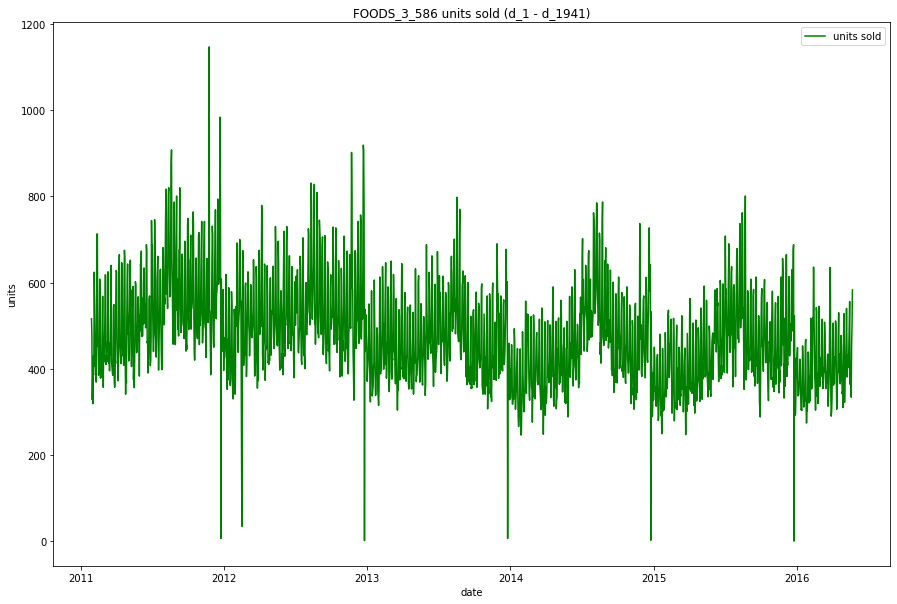

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(food_3_586['date'], food_3_586['units'],c = "g")  

# 設定圖例，參數為標籤、位置
plt.title("FOODS_3_586 units sold (d_1 - d_1941)")
plt.legend(labels=["units sold"])
plt.xlabel("date")
plt.ylabel("units")

plt.show()

### AI training data preparation - 1 (incompleted)

In [ ]:
test_raw = pd.read_csv("/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/data/sales_train_evaluation.csv")

In [ ]:
for i in range(1941):
  a = i + 1
  days = "d_" + str(a)
  test_raw[days] = test_raw[days].astype('int16')

In [ ]:
ai_train = test_raw[test_raw.columns.to_list()[6:]].T

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ai_train_scaled = scaler.fit_transform(ai_train)
ai_train_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.3       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.6       , 0.        , 0.5       , ..., 0.05      , 0.08333333,
        0.16666667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.08333333,
        0.41666667],
       [0.2       , 0.        , 0.16666667, ..., 0.1       , 0.        ,
        0.08333333]])

In [ ]:
type(ai_train_scaled)

numpy.ndarray

In [ ]:
x_train = []
y_train = []
for i in range(21, 1941):
    x_train.append(ai_train_scaled[i-21:i])
    y_train.append(ai_train_scaled[i][0:30490])


x_train = np.array(x_train,dtype="float32")
y_train = np.array(y_train,dtype="float32")

x_train.shape

(1920, 21, 30490)

### Model Building -1 (incompleted)

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units =64,input_shape = (np.array(x_train).shape[1], np.array(x_train).shape[2]),return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units =64))
model.add(tf.keras.layers.Dense(30490))

model.compile(
  loss='mean_squared_error',
  optimizer=tf.keras.optimizers.Adam(0.001)
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 21, 64)            7822080   
_________________________________________________________________
dropout (Dropout)            (None, 21, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 30490)             1981850   
Total params: 9,836,954
Trainable params: 9,836,954
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs = 12, batch_size = 28)

Epoch 1/12
69/69 [==============================] - 37s 48ms/step - loss: 0.0171
Epoch 2/12
69/69 [==============================] - 3s 45ms/step - loss: 0.0136
Epoch 3/12
69/69 [==============================] - 3s 45ms/step - loss: 0.0132
Epoch 4/12
69/69 [==============================] - 3s 46ms/step - loss: 0.0128
Epoch 5/12
69/69 [==============================] - 3s 45ms/step - loss: 0.0127
Epoch 6/12
69/69 [==============================] - 3s 46ms/step - loss: 0.0123
Epoch 7/12
69/69 [==============================] - 3s 45ms/step - loss: 0.0121
Epoch 8/12
69/69 [==============================] - 3s 45ms/step - loss: 0.0120
Epoch 9/12
69/69 [==============================] - 3s 45ms/step - loss: 0.0120
Epoch 10/12
69/69 [==============================] - 3s 46ms/step - loss: 0.0118
Epoch 11/12
69/69 [==============================] - 3s 46ms/step - loss: 0.0118
Epoch 12/12
69/69 [==============================] - 3s 45ms/step - loss: 0.0116


In [ ]:
test_d_1942= ai_train[-21:]
test_d_1942_scaled = scaler.transform(test_d_1942)

x_test = []
x_test.append(test_d_1942_scaled)
x_test = np.array(x_test, dtype="float32")

predict_d_1942=model.predict([x_test])
predict_d_1942

In [ ]:
ai_train[-14:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,30450,30451,30452,30453,30454,30455,30456,30457,30458,30459,30460,30461,30462,30463,30464,30465,30466,30467,30468,30469,30470,30471,30472,30473,30474,30475,30476,30477,30478,30479,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
d_1928,2,0,0,2,2,0,0,3,0,1,0,0,0,1,2,6,6,0,4,0,0,1,3,1,2,0,0,1,2,8,0,9,0,0,0,1,0,1,0,1,...,6,6,1,1,2,0,0,2,1,2,0,1,3,3,0,0,8,5,2,4,0,2,0,37,3,1,2,0,0,0,3,0,3,4,0,0,0,0,1,1
d_1929,2,0,0,1,2,3,0,1,0,0,1,1,0,1,0,17,1,0,2,0,0,1,0,0,1,0,2,2,0,3,0,0,0,1,0,1,0,0,0,1,...,6,8,0,1,6,2,0,0,1,0,1,1,9,0,1,0,0,0,1,1,0,2,0,8,1,0,2,0,0,0,1,1,1,1,2,0,0,3,0,0
d_1930,1,0,1,1,2,0,0,18,0,0,0,0,0,0,0,0,1,0,2,0,2,0,2,0,0,0,2,1,3,1,0,3,0,0,0,0,2,0,1,0,...,5,7,1,0,3,1,1,1,0,0,0,1,12,3,0,0,11,0,0,5,0,4,0,23,5,1,2,1,0,0,2,2,1,0,0,1,0,3,2,0
d_1931,0,0,0,1,2,5,0,47,0,1,0,0,1,2,0,0,0,0,3,0,1,0,1,0,0,0,0,1,1,1,0,2,0,2,0,1,1,1,0,1,...,7,6,0,0,10,2,2,1,0,0,1,1,2,5,4,1,4,0,0,1,0,6,0,24,1,1,1,0,14,1,3,1,1,2,2,0,0,1,1,0
d_1932,2,0,1,1,0,2,0,7,1,0,0,0,1,1,9,13,1,0,21,0,0,0,1,0,0,0,2,2,1,1,0,12,1,0,0,0,0,0,0,2,...,4,9,0,1,2,2,2,2,0,3,1,0,6,4,0,0,22,0,1,1,0,1,0,22,0,0,5,0,0,1,4,2,4,2,1,1,0,0,1,1
d_1933,4,1,0,1,0,1,1,0,0,0,0,1,1,1,15,6,3,0,4,0,1,0,2,1,0,0,0,2,2,2,0,21,1,1,0,0,0,0,0,0,...,2,9,0,1,1,0,0,2,1,2,0,0,11,6,1,2,9,0,0,2,0,3,1,42,2,0,1,0,1,0,4,1,0,2,2,0,0,0,1,2
d_1934,0,2,2,0,0,0,0,6,0,1,0,0,1,1,0,0,1,0,17,0,2,0,1,0,2,0,0,0,1,11,0,14,0,1,0,0,4,0,0,0,...,6,16,5,2,4,0,0,5,0,2,0,1,9,5,1,1,15,0,1,4,0,4,5,21,1,2,0,0,0,0,3,2,5,0,5,3,0,1,1,0
d_1935,0,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,2,0,5,0,0,0,1,0,0,0,0,0,3,5,0,0,0,0,0,1,0,0,0,0,...,5,7,0,2,2,0,0,0,0,3,1,2,6,4,1,1,8,0,1,3,0,1,0,26,1,0,3,0,4,1,4,4,1,2,3,0,0,2,4,5
d_1936,0,1,0,0,1,1,0,15,0,2,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,1,0,1,...,6,4,0,1,1,1,1,5,0,1,0,0,3,4,0,1,6,1,0,1,0,3,0,25,1,2,3,1,9,0,2,1,0,0,2,1,0,0,6,4
d_1937,0,0,0,1,0,0,1,5,0,1,0,1,0,2,0,5,0,0,7,0,3,0,1,0,1,0,0,0,3,0,0,4,0,0,0,0,0,2,0,0,...,6,6,0,0,2,1,0,0,0,6,0,0,6,3,0,2,8,0,0,1,0,2,1,21,1,0,7,0,0,0,3,6,3,0,0,1,0,1,0,0


In [ ]:
predict_d_1942 = scaler.inverse_transform(predict_d_1942)
predict_d_1942

array([[1.0212812 , 0.23940572, 0.7390305 , ..., 0.6569909 , 0.9781196 ,
        1.256643  ]], dtype=float32)

In [ ]:
predict_d_1942.max()

95.98834

In [ ]:
x_train[0].shape

(21, 30490)

In [ ]:
try1 = x_train[0]
try2 = x_train[0]

A = np.vstack((try1,try2))

A.shape

(42, 30490)

### AI training data preparation -2

In [ ]:
test_raw = pd.read_csv("/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/data/sales_train_evaluation.csv")
prices_raw = pd.read_csv("/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/data/sell_prices.csv")
calendar_raw = pd.read_csv("/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/data/calendar.csv")
submit_sample = pd.read_csv('/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/data/sample_submission.csv')

In [ ]:
### 轉換資料格式 (降低 memory usage)

for i in test_raw:
  if test_raw[i].dtype == "int64":
    test_raw[i] = test_raw[i].astype("int16")
  elif test_raw[i].dtype == "float64":
    test_raw[i] = test_raw[i].astype("float32")

for i in prices_raw:
  if prices_raw[i].dtype == "int64":
    prices_raw[i] = prices_raw[i].astype("int16")
  elif prices_raw[i].dtype == "float64":
    prices_raw[i] = prices_raw[i].astype("float32")

for i in calendar_raw:
  if calendar_raw[i].dtype == "int64":
     calendar_raw[i] = calendar_raw[i].astype("int16")
  elif calendar_raw[i].dtype == "float64":
    calendar_raw[i] = calendar_raw[i].astype("float32")

In [ ]:
ai_train = test_raw.sort_values(by='id', ascending=True)[test_raw.columns.to_list()[6:]].T
ai_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1941 entries, d_1 to d_1941
Columns: 30490 entries, 1612 to 29052
dtypes: int16(30490)
memory usage: 112.9+ MB


In [ ]:
prices_raw['id'] = prices_raw['item_id'] + "_" + prices_raw['store_id']
price_date = prices_raw[["id","wm_yr_wk","sell_price"]].merge(calendar_raw[['d','wm_yr_wk']], on='wm_yr_wk')
prices_att = price_date[["id","d","sell_price"]].pivot(index="id",columns="d", values="sell_price")
prices_att =  prices_att.reset_index().rename_axis(None, axis=1).sort_values(by='id', ascending=True).fillna(0)

### 只到 d_1941
prices_att1 = prices_att[test_raw.columns.to_list()[6:]]
prices_train = prices_att1.T
prices_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1941 entries, d_1 to d_1941
Columns: 30490 entries, 0 to 30489
dtypes: float32(30490)
memory usage: 225.8+ MB


In [ ]:
calendar_raw['timing'] = 0
c = 0
for i in calendar_raw['event_name_1'].isnull():
  if i is False:
    calendar_raw['timing'][c] += 1
  c += 1

b = 0
for i in calendar_raw['event_name_2'].isnull():
  if i is False:
    calendar_raw['timing'][b] += 1
  b += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
event = price_date[["id","d","sell_price"]].merge(calendar_raw[['d','snap_CA','snap_TX','snap_WI','timing']], on='d')

event['timing'] = (event['snap_CA']+1) * event['timing']
event['timing'] = (event['snap_TX']+1) * event['timing']
event['timing'] = (event['snap_WI']+1) * event['timing']
event['timing'] = event['timing'].astype('int8')
event_att = event[["id","d","timing"]].pivot(index="id",columns="d", values="timing")
event_att = event_att.reset_index().rename_axis(None, axis=1).sort_values(by='id', ascending=True).fillna(0)

event_att1 = event_att[test_raw.columns.to_list()[6:]]
event_train = event_att1.T
event_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1941 entries, d_1 to d_1941
Columns: 30490 entries, 0 to 30489
dtypes: float64(30490)
memory usage: 451.5+ MB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_units = MinMaxScaler()
ai_train_scaled = scaler_units.fit_transform(ai_train).astype('float32')

scaler_prices = MinMaxScaler()
prices_train_scaled = scaler_prices.fit_transform(prices_train).astype('float32')

scaler_event = MinMaxScaler()
event_train_scaled = scaler_event.fit_transform(event_train).astype('float32')

In [ ]:
x_train = []
y_train = []
for i in range(1941-750, 1941):
    x_train.append(np.vstack((prices_train_scaled[i-7:i+1], event_train_scaled[i-7:i+1], ai_train_scaled[i-7:i])))
    y_train.append(ai_train_scaled[i][0:30490])


x_train = np.array(x_train,dtype="float32")
y_train = np.array(y_train,dtype="float32")

x_train.shape

# x_train.append(np.vstack((prices_train_scaled[i-7:i], event_train_scaled[i-7:i], ai_train_scaled[i-7:i])))

(750, 23, 30490)

### model building -2

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units =64,input_shape = (np.array(x_train).shape[1], np.array(x_train).shape[2]),return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units =64))
model.add(tf.keras.layers.Dense(30490, activation='relu'))

model.compile(
  loss='mean_squared_error',
  optimizer=tf.keras.optimizers.Adam(0.001)
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 23, 64)            7822080   
_________________________________________________________________
dropout (Dropout)            (None, 23, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 30490)             1981850   
Total params: 9,836,954
Trainable params: 9,836,954
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs = 60, batch_size = 28)

Epoch 1/60
27/27 [==============================] - 35s 58ms/step - loss: 0.0219
Epoch 2/60
27/27 [==============================] - 1s 53ms/step - loss: 0.0185
Epoch 3/60
27/27 [==============================] - 1s 55ms/step - loss: 0.0185
Epoch 4/60
27/27 [==============================] - 1s 51ms/step - loss: 0.0183
Epoch 5/60
27/27 [==============================] - 1s 53ms/step - loss: 0.0178
Epoch 6/60
27/27 [==============================] - 1s 51ms/step - loss: 0.0172
Epoch 7/60
27/27 [==============================] - 1s 52ms/step - loss: 0.0169
Epoch 8/60
27/27 [==============================] - 1s 52ms/step - loss: 0.0164
Epoch 9/60
27/27 [==============================] - 1s 50ms/step - loss: 0.0161
Epoch 10/60
27/27 [==============================] - 1s 48ms/step - loss: 0.0156
Epoch 11/60
27/27 [==============================] - 1s 51ms/step - loss: 0.0154
Epoch 12/60
27/27 [==============================] - 1s 53ms/step - loss: 0.0152
Epoch 13/60
27/27 [=================

In [ ]:
x_valid = []
y_valid = []
for i in range(1913, 1941):
    x_valid.append(np.vstack((prices_train_scaled[i-7:i+1], event_train_scaled[i-7:i+1], ai_train_scaled[i-7:i])))
    y_valid.append(ai_train_scaled[i][0:30490])

x_valid = np.array(x_valid,dtype="float32")
y_valid = np.array(y_valid,dtype="float32")

x_valid.shape

(28, 23, 30490)

In [ ]:
predict2 = model.predict(x_valid)
predict2 = scaler_units.inverse_transform(predict2)
predict2.shape

(28, 30490)

In [ ]:
columns_p = []
for i in range(28):
  a = i +1
  day = "F" + str(a)
  columns_p.append(day)

In [ ]:
pre_valid = pd.DataFrame(predict2.T, columns=columns_p)
pre_valid

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,0.902545,0.805865,0.812633,0.748962,0.923015,0.963146,0.950109,0.775071,0.864937,0.751291,0.771431,0.699500,0.955306,0.693354,0.760309,0.565249,0.734390,0.649714,0.662825,1.034348,1.077549,0.694504,0.675661,0.611699,0.547066,0.525101,0.478067,0.515178
1,1.144874,0.953511,0.933132,0.971437,0.979668,1.372079,1.381365,0.558492,0.334489,0.162030,0.070623,0.252623,0.817741,1.090904,0.793708,0.413233,0.352242,0.333786,0.716639,1.416500,1.574336,0.526856,0.232904,0.155043,0.207961,0.653346,1.488431,1.711428
2,0.555422,0.472829,0.558187,0.453708,0.583359,1.533481,1.538389,0.456761,0.400079,0.660695,0.829504,0.718047,1.178332,0.741025,0.276867,0.521071,0.879942,0.801467,0.791560,1.414925,1.403305,0.697661,0.857901,1.042711,1.078436,1.089821,1.455980,1.684096
3,0.419233,0.295406,0.322319,0.329736,0.387452,0.214982,0.292625,0.411123,0.282095,0.222093,0.296578,0.284963,0.179818,0.247700,0.308888,0.216671,0.251588,0.241833,0.245611,0.000000,0.000000,0.203281,0.168582,0.246361,0.289076,0.331209,0.170475,0.085164
4,0.148727,0.385351,0.497871,0.596861,0.883904,0.666599,0.765772,1.061635,1.199386,1.169267,1.265487,1.375352,1.734363,1.129712,1.188013,1.306217,1.448731,1.370039,1.313659,1.229901,0.691927,0.920253,0.970107,0.828044,0.734563,0.513504,0.348998,0.495196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0.163118,0.080772,0.072911,0.070491,0.120555,0.000000,0.000000,0.104552,0.073286,0.064382,0.079472,0.089948,0.000000,0.002870,0.011241,0.000000,0.000000,0.000000,0.000000,0.055463,0.125821,0.183021,0.138405,0.212512,0.326539,0.409415,0.352319,0.302889
30486,0.078100,0.062235,0.089415,0.100549,0.168116,0.347488,0.436924,0.252077,0.248186,0.217525,0.167625,0.212019,0.418961,0.402513,0.279120,0.278735,0.266642,0.259846,0.294369,0.431954,0.579499,0.337859,0.345946,0.392629,0.465473,0.556168,0.728593,0.819450
30487,0.034098,0.077938,0.109860,0.141067,0.191695,0.225465,0.125589,0.062806,0.094832,0.142865,0.175280,0.227049,0.336684,0.190595,0.098350,0.100027,0.128355,0.162600,0.183198,0.186935,0.095975,0.095787,0.116280,0.125631,0.136028,0.120399,0.023123,0.000000
30488,0.053989,0.030816,0.032315,0.067834,0.129281,0.135974,0.086248,0.055151,0.039482,0.024284,0.004128,0.032708,0.083796,0.021696,0.060093,0.056046,0.063789,0.087210,0.119538,0.183900,0.199602,0.140155,0.093665,0.073746,0.095533,0.130958,0.176263,0.184060


In [ ]:
pre_valid.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
mean,1.248943,1.186570,1.207962,1.228137,1.490494,1.682626,1.712720,1.425025,1.384395,1.273629,1.233811,1.458793,1.664955,1.538958,1.539563,1.251336,1.388964,1.343874,1.495686,1.684043,1.711947,1.401513,1.250413,1.230810,1.280560,1.413272,1.683338,1.719210
std,2.673203,2.550972,2.598182,2.637399,3.174955,3.571258,3.634469,3.037695,2.957943,2.729259,2.643980,3.103563,3.528539,3.262807,3.266991,2.671866,2.959579,2.867205,3.177109,3.567817,3.627504,2.985094,2.676471,2.637343,2.738137,3.009920,3.569491,3.646365
min,-1.877470,-2.018935,-2.405391,-2.258137,-1.258667,-1.537077,-2.264608,-1.700978,-1.519829,-2.147107,-2.295660,-2.326348,-2.049181,-2.361032,-2.119184,-2.636251,-2.337322,-2.500769,-1.933314,-1.591274,-2.281028,-1.877602,-1.927768,-2.180097,-1.935103,-1.865698,-1.407798,-2.255322
25%,0.230148,0.220554,0.225619,0.230467,0.284886,0.318516,0.320053,0.265849,0.258952,0.237348,0.231767,0.279147,0.317540,0.290234,0.290415,0.233681,0.262941,0.253533,0.285169,0.319239,0.321162,0.261405,0.233410,0.231716,0.243030,0.269964,0.321676,0.323488
50%,0.551228,0.522816,0.532054,0.541435,0.661150,0.743636,0.758682,0.630388,0.612812,0.561973,0.543631,0.645686,0.737617,0.684069,0.683337,0.552281,0.614911,0.594487,0.665372,0.746925,0.760037,0.620574,0.551761,0.542518,0.566296,0.626215,0.744475,0.761221
75%,1.254252,1.187956,1.207641,1.226627,1.485869,1.693417,1.724523,1.431618,1.388081,1.275967,1.235687,1.457482,1.670252,1.545381,1.546760,1.256529,1.393455,1.349416,1.497246,1.693990,1.722263,1.409934,1.252952,1.233187,1.281845,1.409916,1.691355,1.730867
max,104.537498,101.834732,104.038139,105.738670,125.942917,138.511612,139.404037,118.219566,116.392090,107.888390,105.055496,122.384109,136.228180,125.281982,126.050690,104.167610,116.336205,112.607224,124.464188,137.518326,138.957779,115.793114,105.534035,104.852150,109.065628,119.202789,138.834061,140.338089


### evaluation set

In [ ]:
columns_e = []
for i in range(35):
  a = i + 1935
  day = "d_" + str(a)
  columns_e.append(day)

In [ ]:
prices_eva_scaled = scaler_prices.transform(prices_att[columns_e].T)
event_eva_scaled = scaler_event.transform(event_att[columns_e].T)

In [ ]:
for i in range(28):
  f_att = np.vstack((prices_train_scaled[i:i+8], event_train_scaled[i:i+8], ai_train_scaled[-7:]))
  predict_f = model.predict(np.array([f_att]))
  ai_train_scaled = np.vstack((ai_train_scaled,predict_f))

In [ ]:
pre_eva = pd.DataFrame(scaler_units.inverse_transform(ai_train_scaled[-28:]).T, columns=columns_p)
pre_eva 

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,0.590104,0.536032,0.533524,0.529941,0.521953,0.553621,0.624289,0.641113,0.561112,0.550983,0.545107,0.541002,0.570764,0.642339,0.650763,0.557625,0.535370,0.556000,0.553402,0.579400,0.638093,0.640206,0.557366,0.556435,0.574965,0.577306,0.597173,0.628324
1,1.116621,0.461569,0.394399,0.394190,0.519393,1.092517,1.455001,0.919833,0.563524,0.539424,0.542642,0.678282,1.306003,1.601856,0.960380,0.616364,0.553749,0.566252,0.711694,1.394515,1.716085,0.968246,0.630852,0.555318,0.571829,0.755921,1.508333,1.848737
2,1.231090,0.877384,0.930218,0.955420,0.964161,1.469943,1.599421,0.922989,0.821381,0.927845,0.938117,0.932940,1.352426,1.464757,0.764030,0.744096,0.864956,0.928492,0.939590,1.406405,1.501224,0.781378,0.775379,0.934351,0.980704,0.994406,1.565060,1.705056
3,0.280561,0.295690,0.247272,0.253918,0.280243,0.186658,0.055542,0.292942,0.245500,0.238340,0.261037,0.293670,0.225824,0.098973,0.306981,0.249364,0.249524,0.271368,0.304322,0.223914,0.085081,0.305990,0.246134,0.242833,0.265428,0.299821,0.199230,0.043390
4,1.126810,1.158923,1.137890,1.213611,1.293814,1.224252,0.986939,1.092213,1.134204,1.129972,1.228119,1.299742,1.162251,0.869041,0.967768,1.083196,1.128453,1.199786,1.250728,1.039373,0.723950,0.928543,1.056737,1.080848,1.144045,1.129315,0.834958,0.572839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0.240400,0.209906,0.188677,0.241726,0.310352,0.248196,0.130346,0.233689,0.168367,0.141414,0.178450,0.232803,0.133291,0.042136,0.186018,0.128801,0.122041,0.151709,0.201292,0.100386,0.022663,0.178340,0.119754,0.125512,0.160699,0.213335,0.123992,0.068390
30486,0.523576,0.381313,0.371826,0.393728,0.436562,0.596857,0.645993,0.418759,0.342074,0.322595,0.329542,0.368401,0.513209,0.563073,0.368958,0.310180,0.304267,0.310496,0.349914,0.499120,0.552114,0.363747,0.310500,0.317563,0.329671,0.370113,0.527560,0.585228
30487,0.000000,0.046412,0.079555,0.113628,0.139902,0.117074,0.042714,0.024919,0.054582,0.081558,0.116221,0.146217,0.138060,0.060464,0.039223,0.064226,0.089850,0.122385,0.151735,0.141060,0.056321,0.040438,0.064872,0.092020,0.122689,0.144906,0.115353,0.026725
30488,0.126499,0.086278,0.065104,0.069202,0.101683,0.150230,0.117086,0.088446,0.075290,0.058395,0.064609,0.099510,0.148762,0.114933,0.083086,0.072214,0.055003,0.067896,0.105502,0.154479,0.120392,0.091422,0.076454,0.064220,0.078199,0.117932,0.168315,0.136114


In [ ]:
pre_eva.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
mean,1.413455,1.286922,1.266744,1.297640,1.323524,1.331023,1.336319,1.310777,1.293854,1.292672,1.289779,1.283452,1.280368,1.277396,1.272624,1.268628,1.263554,1.256395,1.248676,1.240994,1.233049,1.225631,1.219481,1.214315,1.210035,1.206373,1.200584,1.195123
std,3.032784,2.777037,2.758677,2.844242,2.911180,2.933107,2.947907,2.901925,2.879794,2.892332,2.896495,2.890723,2.890478,2.888713,2.883886,2.880182,2.873720,2.862972,2.851608,2.840774,2.829779,2.821129,2.815322,2.811766,2.810039,2.814043,2.811641,2.804579
min,-1.787446,-1.636264,-1.900643,-2.091915,-2.049084,-2.288410,-2.271468,-3.760273,-5.915842,-6.734554,-6.822065,-7.154909,-6.804780,-5.983669,-5.029225,-3.736486,-2.226837,-1.654757,-1.715266,-1.728885,-1.716783,-1.697153,-1.666679,-1.771498,-1.974932,-2.242517,-2.509423,-2.596970
25%,0.263705,0.240661,0.238641,0.245159,0.249971,0.251164,0.250974,0.245054,0.239962,0.238476,0.236679,0.233301,0.231789,0.229584,0.227899,0.224721,0.221876,0.218472,0.215365,0.212334,0.209811,0.207548,0.205618,0.203730,0.202000,0.200674,0.199189,0.198025
50%,0.618747,0.567618,0.559580,0.573127,0.583994,0.586434,0.590468,0.576466,0.567667,0.565576,0.562720,0.557007,0.553755,0.551388,0.547449,0.545224,0.542444,0.538826,0.534623,0.530052,0.524948,0.520105,0.515914,0.511847,0.509736,0.507145,0.502791,0.500212
75%,1.419812,1.292348,1.273342,1.303582,1.329817,1.340042,1.347645,1.320808,1.305951,1.302218,1.298318,1.290482,1.286627,1.282458,1.279513,1.274381,1.263859,1.257888,1.251417,1.242734,1.235440,1.225786,1.218518,1.214498,1.208124,1.201860,1.195750,1.187964
max,118.408882,113.175087,118.322678,125.451706,129.508621,130.398132,129.970947,128.872620,129.109955,130.660126,131.250519,130.759705,130.289413,129.519012,128.620895,127.530937,126.227676,124.823227,123.516304,122.442497,121.549171,121.137962,120.905777,120.841339,120.891212,121.435890,121.451454,121.253487


In [ ]:
pre_valid['id'] = prices_att['id'] + "_validation"
pre_eva['id'] = prices_att['id'] + "_evaluation"

In [ ]:
columns_f = ['id', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
             'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
             'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28']

sumbit_final = pd.concat([pre_valid[columns_f], pre_eva[columns_f]])
# sumbit_final = pd.concat([CCC[columns_f], pre_eva[columns_f]])

In [ ]:
### 去除 負值

columns_gg = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
             'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
             'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28']

sumbit_final[sumbit_final[columns_gg] < 0] = np.nan
sumbit_final = sumbit_final.fillna(0)

In [ ]:
sumbit_final.to_csv("/content/drive/MyDrive/ken_lab/Kaggle_M5 Forecasting - Accuracy/sumission_V13.csv", index=False)

In [ ]:
sumbit_final.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
count,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000,60980.000000
mean,1.436736,1.239371,1.200199,1.200556,1.415843,1.652321,1.722578,1.461471,1.339740,1.261722,1.309189,1.384494,1.692746,1.587281,1.469392,1.274497,1.310153,1.294059,1.391303,1.718992,1.776334,1.431912,1.277403,1.248984,1.293989,1.417678,1.659088,1.721988
std,3.032404,2.592353,2.536000,2.575302,3.102662,3.685643,3.765222,3.056867,2.794039,2.652093,2.811992,3.042663,3.801520,3.523374,3.116482,2.678899,2.792086,2.779464,3.080540,3.886975,3.909007,2.992304,2.663017,2.641859,2.808434,3.163474,3.756712,3.798361
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230016,0.207796,0.206899,0.206120,0.239884,0.266031,0.266689,0.237830,0.225894,0.216847,0.224199,0.231691,0.270686,0.245132,0.236686,0.212218,0.221485,0.218238,0.230034,0.271541,0.268645,0.233242,0.216079,0.214318,0.216005,0.227977,0.253920,0.249220
50%,0.632456,0.549786,0.532227,0.527219,0.616271,0.718890,0.751236,0.645211,0.591339,0.556671,0.572785,0.598514,0.730810,0.690316,0.645555,0.562377,0.575208,0.565162,0.601612,0.739612,0.770311,0.630764,0.563881,0.548981,0.560656,0.607249,0.710003,0.746093
75%,1.479759,1.269738,1.225500,1.216032,1.419056,1.675600,1.779725,1.498720,1.365490,1.283700,1.315684,1.380208,1.705265,1.615384,1.497713,1.300534,1.332841,1.305236,1.387775,1.736158,1.820586,1.460203,1.308229,1.267388,1.302795,1.415412,1.681861,1.782759
max,106.142410,85.637550,89.059593,98.174171,127.283699,157.402863,154.868896,101.710724,85.889938,88.948288,99.119781,119.985947,151.112793,153.677353,115.162025,98.715477,107.939598,102.456841,131.721069,181.291656,166.817856,97.097694,87.835426,95.362144,109.893448,130.043503,157.588867,158.491272
